In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [5]:
def show_img(image):
    plt.figure(figsize=(12, 10), dpi=80)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()

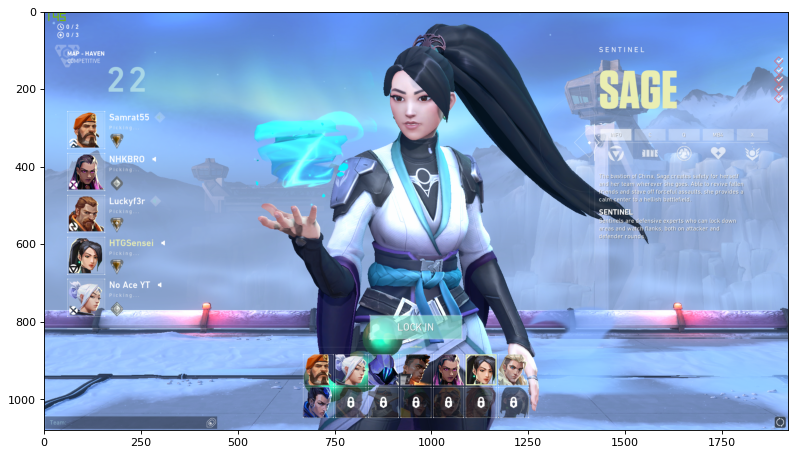

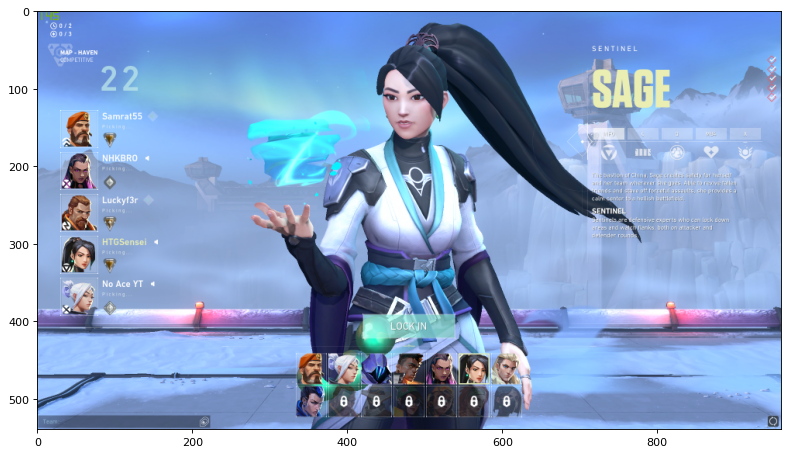

In [6]:
original_img=cv.imread('sage.png')
#print(original_img.shape)
resized_img=cv.resize(original_img,(original_img.shape[1]//2,original_img.shape[0]//2))
#plt.imshow(original_img)
show_img(original_img)
show_img(resized_img)

Resource for smoothing images:https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html

Gaussian filter is kernel of desired size, with parameters of the matrix being normalized 2-D gaussian function. The filter is then convolved on the image to get the desired blurring.

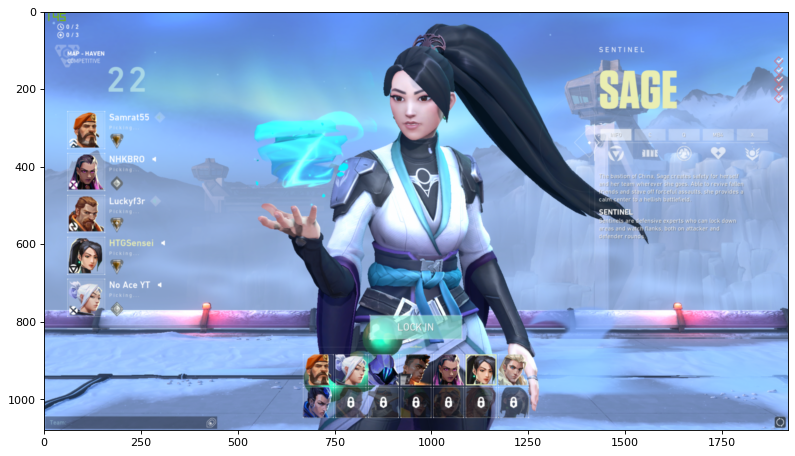

In [7]:
gblur_img=cv.GaussianBlur(original_img,(3,3),0)
show_img(gblur_img)

Similar to gaussian filter, but the parameters of the matrix are constant and it is normalized depending on the size. In other words, the output is average of the intesity of pixels upon convolution. 

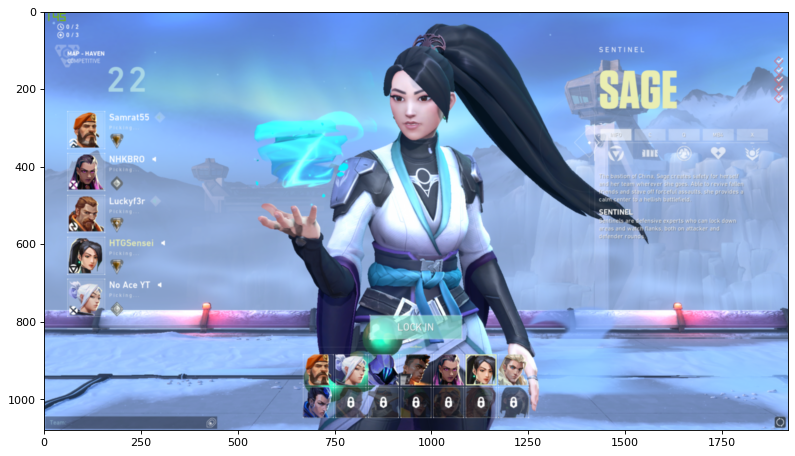

In [8]:
blur_img=cv.blur(original_img,(3,3))
show_img(blur_img)

Bilateral filter is a modification of gaussian filter aiming to preserve the edges(which are lost upon blurring using the mean and gaussian filters). It this filter the gaussian of difference in intensity of the pixels is also multiplies, so that larger pixel with larger itensity difference from the central pixel wil have lesser weight during the convolution. 
https://www.geeksforgeeks.org/python-bilateral-filtering/

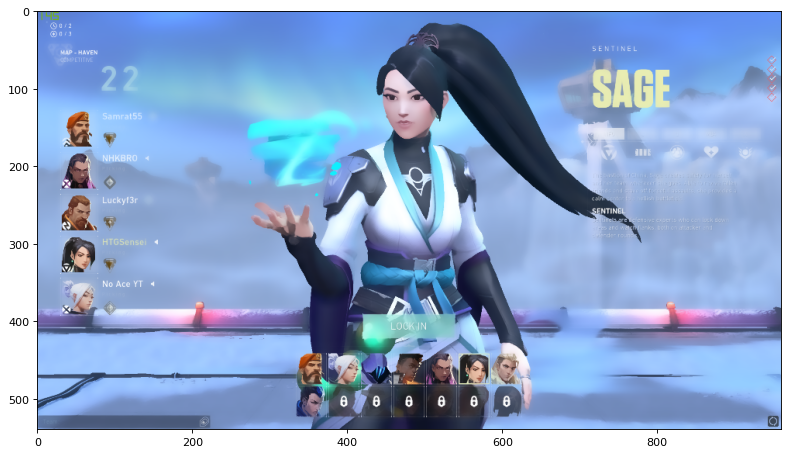

In [10]:
bilateral_img=cv.bilateralFilter(resized_img,15,75,75)
show_img(bilateral_img)

Types of noises:-  
1)Gaussian Noise: Random fluctuation in intensity of pixels due to thermal energy/circuitry of camera or other environmental factors. Algorithms{Gaussian, Mean, Bilateral}  
2)Salt and pepper noise: An image is said to have such a noise if it has black pixels in bright background and bright pixels in dark background. It results from errors in analog to digital conversion, errors in transmission of bytes, etc. Algorithms{median filter}  
3)Shot noise/Poisson Noise: This type of noise is due to uncertainities in detection of number of photons by sensors. It is not due to inefficiency of sensors, but due to fundamental nature of light and charges. It is more prevalent in areas having greater intensity. Algorithm{Gaussian, mean, bilateral}

Sobel Filter: It is a filter used for edge detection. Two different filters are used for horizontal and vetical edge detection respectively. The filter is given by:  
[1  0  -1  
 2  0  -2  
 1  0  -1]  
 for vertical edge detection and its transpose is used for horizontal edge detection.  
 Wherever there is rapid change in intensity of pixels, the filter will output some non- zero number hence 
 is able to detect edges.

Canny edge detection is an inbuilt function in opencv library. It is a multistep process:-  
1)Noise reduction  
2)Finding gradient using the above described method  
3)Non-maximum suppression  
4)Hysterisis thresholding  
https://docs.opencv.org/master/da/d22/tutorial_py_canny.html

Conversion from RGB to grayscale: One way is to find average of intensities of R,G,B. There is also another way of finding weighted sum, the weights being functions of wavelengths of R,G,B.

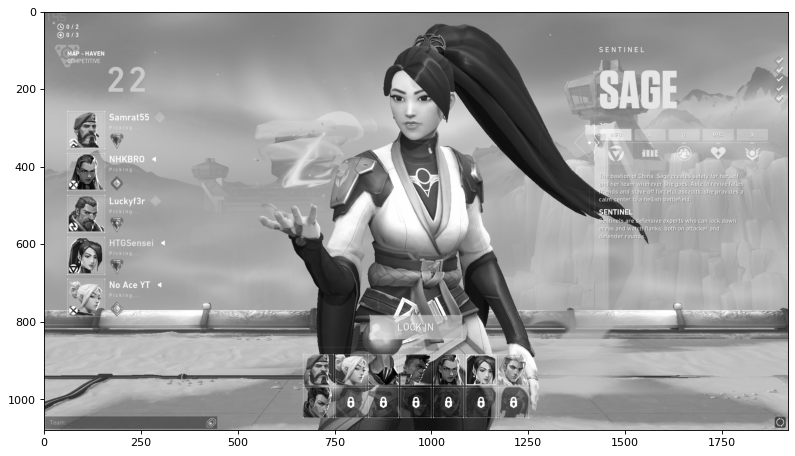

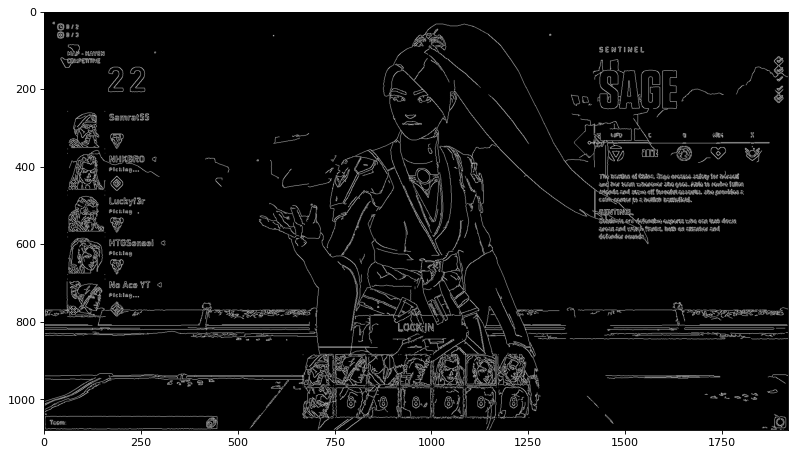

In [11]:
grayscale_img=cv.cvtColor(original_img,cv.COLOR_BGR2GRAY)#opencv uses non-weighted average
edgedet_img=cv.Canny(grayscale_img,100,200)
show_img(grayscale_img)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(edgedet_img,cmap='gray')
plt.show()

High pass and low pass filter:  
High pass filter: Filters which when convoluved on images, preseve high frequency components of the image. These filters are used for sharpening of images. {Eg: sobel, scharr}  
Low pass filter: Filters which when convolved on images, preserve low frequency components of the image. Used for smoothing of images. {Eg: Gaussian, Mean}  
But what are frequencies in images?  
The 2-D function of intensity corresponding to an image can be converted to frequency domain using fourier transform(for N points, computation is proportional to N^2, there is also fast fourier transform algorithm with computation proportional to NlogN, where N is the number of points).  
Low frequencies correspond to bulk(slow change in intensity wrt to spacial coordinates) while high frequency components represent edges.  
https://www.youtube.com/watch?v=QdM-QariW30  
https://www.geeksforgeeks.org/difference-between-low-pass-filter-and-high-pass-filter/

Some useful/interesting functions in OpenCV:  
1)Histogram equalization:Used to increase the global contrast of the image. The intensity histogram is of original image is changed such the cdf of the probability of occurance of a pixel with given inensity is linear.  
https://towardsdatascience.com/histogram-equalization-5d1013626e64  
For math related to the above transformation:https://en.wikipedia.org/wiki/Histogram_equalization

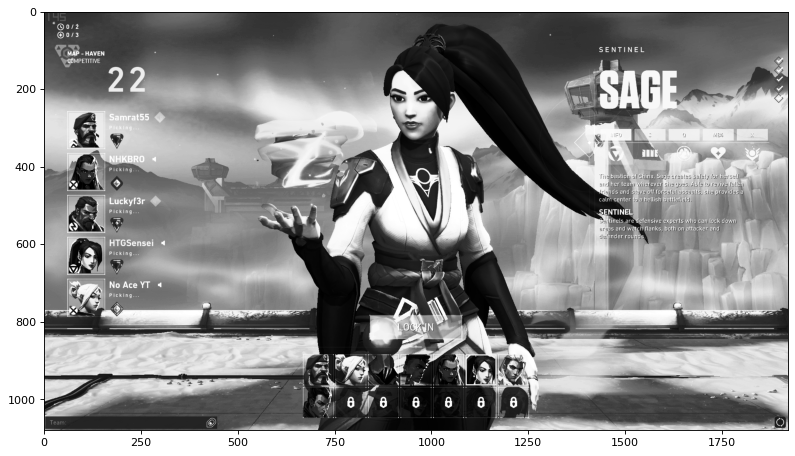

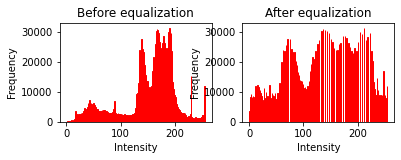

In [12]:

hist_img=cv.equalizeHist(grayscale_img)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(hist_img,cmap='gray')
plt.show()

#Showing histograms of the images
plt.subplot(221)
plt.hist(grayscale_img.flatten(),256,ec='r')
plt.title('Before equalization')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(222)
plt.hist(hist_img.flatten(),256,ec='r')
plt.title('After equalization')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()

Algorithms for contour tracing:  
1)Square tracing algorithm: Start from a white pixel, whenever encounter a white pixel move left and move right upon encountering a black pixel. Stop upon visiting the starting pixel twice.  
2)Moore neighbour tracing: Select a start pixel, and whenever encounter a black background pixel move in clockwise sense untill a white pixel is encountered.  
http://www.imageprocessingplace.com/downloads_V3/root_downloads/tutorials/contour_tracing_Abeer_George_Ghuneim/square.html

Algorithm for bounding boxes:  
1)YOLO algorithm: It is a deep learning algorithm.  
https://www.coursera.org/lecture/convolutional-neural-networks/bounding-box-predictions-9EcTO  





Algorithm for corner detection:  
1)Harris corner detection:https://www.southampton.ac.uk/~msn/book/new_demo/corners/ 
                          https://medium.com/data-breach/introduction-to-harris-corner-detector-32a88850b3f6
